#                                Sensor Component Failure Prediction

### 1) Importing Required Libraries

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier

warnings.filterwarnings("ignore")
%matplotlib inline

#### Read Data

In [5]:
# Load csv file
df = pd.read_csv('aps_failure_training_set1.csv', na_values="na")

In [7]:
# check rows and columns of the dataset
df.shape

(36188, 171)

In [12]:
# Check unique vlaues of target variables
df['class'].value_counts()

neg    35188
pos     1000
Name: class, dtype: int64

In [13]:
# define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print("We have {} numnerical features : {}".format(len(numeric_features),numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 170 numnerical features : ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000

### As this is a sensor data interpertation of the data is not required

## Checking missing values

Text(0, 0.5, 'percentage Missing')

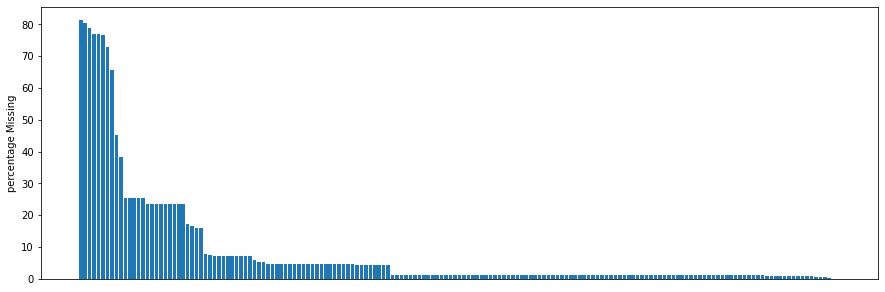

In [42]:
# Plotting missing value count for each column
fig, ax = plt.subplots(figsize=(15,5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("percentage Missing")


### Dropping columns which has more than 70% of missing values

In [44]:
## Dropping columns which has moer than 70% of missing values
dropcols = missing[missing[0]>70]
dropcols

,0
br_000,81.410965
bq_000,80.501824
bp_000,78.794075
ab_000,77.086327
cr_000,77.086327
bo_000,76.533658
bn_000,72.761689


In [46]:
df.drop(list(dropcols.index), axis = 1, inplace= True)

In [47]:
## check shape of the dataset after dropping columns
df.shape

(36188, 164)

In [54]:
missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percentage data that is missing
print(f"Percentage of total missing cells in the data {(total_missing/total_cells) * 100}%")

Percentage of total missing cells in the data 5.37059852747306%


## Visualization of unique values in Target Variable

positive: 1000, Negative: 35188


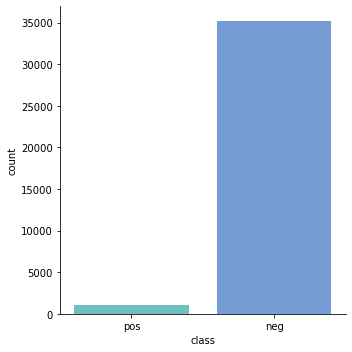

In [63]:
pos = df[df["class"] == 'pos'].shape[0]
neg = df[df["class"] == 'neg'].shape[0]
print("positive: " + str(pos) + ", Negative: " + str(neg))
sns.catplot(data=df, x = 'class', kind = "count", palette = "winter_r", alpha = 0.6)

In [64]:
ls

 Volume in drive C has no label.
 Volume Serial Number is F44C-159E

 Directory of C:\Users\T100262\Documents\GIT_Repo\Avanish Yadav\aps-fault-detection\notebook

01-02-2023  17:18    <DIR>          .
01-02-2023  17:18    <DIR>          ..
01-02-2023  12:44    <DIR>          .ipynb_checkpoints
02-12-2022  12:04        26,974,485 aps_failure_training_set1.csv
01-02-2023  12:45           802,401 Scania_APS_failure_prediction.ipynb
01-02-2023  17:18            28,614 Untitled.ipynb
               3 File(s)     27,805,500 bytes
               3 Dir(s)  188,634,763,264 bytes free
